In [265]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

In [266]:
from sklearn.model_selection import train_test_split 

In [267]:
data=pd.read_csv('Salary_Data.csv')

In [268]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [270]:
data.count()

YearsExperience    30
Salary             30
dtype: int64

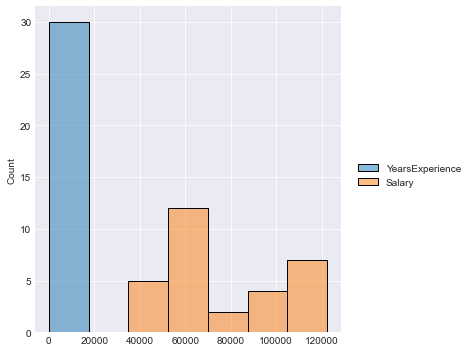

In [271]:
sns.displot(data)

In [272]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

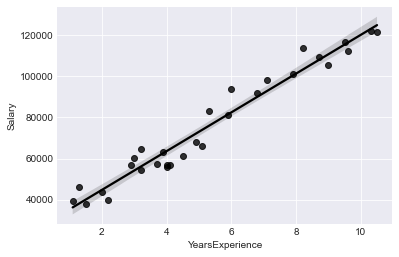

In [273]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'],color='black')

In [274]:
model=smf.ols('Salary~YearsExperience',data=data).fit()

In [275]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.14e-20
Time:                        12:49:57   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [276]:
r2=model.rsquared
r2

0.9569566641435086

============================================================

In [277]:
model1=smf.ols('np.log(Salary)~np.log(YearsExperience)',data=data).fit()

In [278]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           7.40e-16
Time:                        12:50:01   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [279]:
r2=model1.rsquared
r2

0.905215072581715

=====================================================

In [280]:
model2=smf.ols('np.log(Salary)~YearsExperience+pow(YearsExperience,2)',data=data).fit()

In [281]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.95e-18
Time:                        12:50:04   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience             0.2024      0.027      7.601      0.000       0.148       0.257
pow(YearsExperience, 2)    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [282]:
r2=model2.rsquared
r2

0.9486108638487355

Text(0, 0.5, 'Salary')

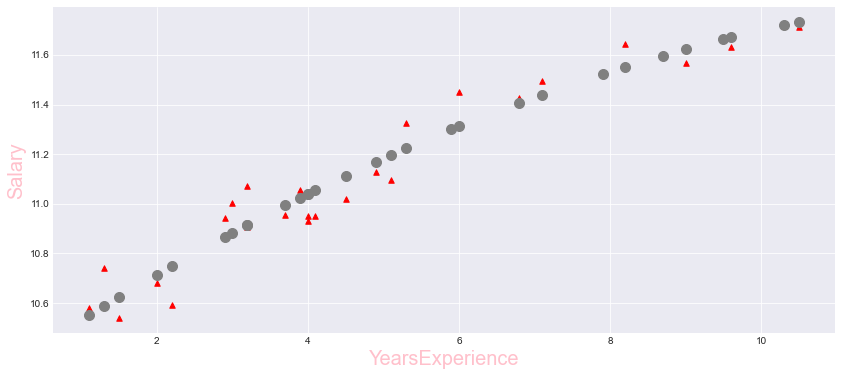

In [283]:
plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")

plt.scatter(data["YearsExperience"],np.log(data["Salary"]),color="red",s=30,marker='^')
plt.scatter(data["YearsExperience"],model2.fittedvalues,color="grey",s=100)


plt.xlabel("YearsExperience",size=20,color="pink")
plt.ylabel("Salary",size=20,color="pink")

In [284]:
# the  table with the new salary 
predicted1 = pd.DataFrame()
predicted1['YearsExperience'] = data.YearsExperience
predicted1['Salary'] = data.Salary
predicted1['Predicted_Salary_Hike'] = pd.DataFrame(model.predict(predicted1.YearsExperience))
predicted1

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


# or  in other way








In [212]:
x=data['YearsExperience'].values.reshape(-1,1)

y=data['Salary']

In [213]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [214]:
y_pred=model.predict(x)


In [215]:
new_experience=data['YearsExperience'].values.reshape(-1,1)

In [216]:
predicted_salary=model.predict(new_experience)


In [238]:

predicted=pd.DataFrame()
predicted['YearsExperience']=data['YearsExperience']
predicted['Salary']=data['Salary']
predicted['predicted_salary']=pd.DataFrame(predicted_salary)

In [207]:
predicted

,YearsExperience,Salary,predicted_salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
